In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("max_rows", None)
pd.set_option("max_columns", 300)

In [3]:
# Read data
df = pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df.shape

(307511, 122)

In [5]:
df.info(verbose = True, null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [6]:
# Check the summary for the numeric column
df.describe(include = 'all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [7]:
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
#Percentage of missing values in all columns 
null_count=round(100*(df.isnull().sum()/len(df.index)),2)
null_count

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [9]:
# columns with high missing percentage i.e >=40%
null_count = null_count[null_count>=40.00]
null_count

OWN_CAR_AGE                     65.99
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTM

In [10]:
len(null_count)

49

#### Remove or impute missing values

In [11]:
# Removing the 49 columns having high percentage of null values
null_cols=([null_count[null_count >=40.00].index])
df.drop(labels=null_cols[0],axis=1,inplace=True)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.shape

(307511, 73)

In [13]:
# Percentage of missing values after removing the above columns
round(100*(df.isnull().sum()/len(df.index)),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

We can observe that still there are few more columns having considerably low percentange of 
null values. However we also need to look at the usefulness of these columns in order to get the
correct insights from the data. 
Let's first remove the unwanted columns from the data for more effective analysis. 

In [14]:
# Removing unwanted columns

unwanted_cols=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=unwanted_cols,axis=1,inplace=True)
df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.shape

(307511, 43)

In [16]:
# Percentage of missing values after removing the unwanted columns
100*(df.isnull().sum()/len(df.index))

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_L

We see that the column 'AMT_ANNUITY' has the lowest percentage of null values i.e. 0.003902
which can be imputed in this case. However let's check the outliers in order find out which 
value to be imputed i.e. mean or median.

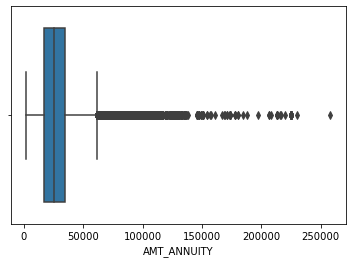

In [20]:
# Let's plot a boxplot to get the outliers

sns.boxplot(df.AMT_ANNUITY);

We can observe that this column has an outlier which is very large imputing with average would 
not be appropriate in this case hence let's impute  the missing values with median.

In [21]:
med_value = df['AMT_ANNUITY'].median()

In [22]:
df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']= med_value
df.AMT_ANNUITY.isnull().sum()

0

Column 'AMT_GOODS_PRICE' has lower percentage of null values i.e. 0.09
which can be imputed in this case. However let's check the outliers in order find out which 
value to be imputed i.e. mean or median.

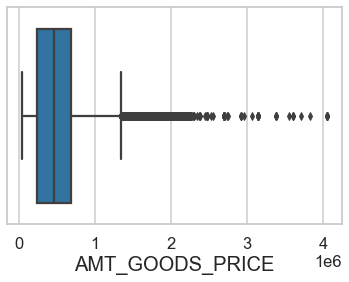

In [54]:
# boxplot to get the outliers

sns.boxplot(df.AMT_GOODS_PRICE);

In [23]:
med_value1 = df['AMT_GOODS_PRICE'].median()

In [24]:
df.loc[df['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']= med_value1
df.AMT_GOODS_PRICE.isnull().sum()

0

In [25]:
# Checking the values of NAME_TYPE_SUITE to check the categorical values 
df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Column 'NAME_TYPE_SUITE' has lower percentage of null values i.e. 0.42%
which can be imputed in this case. As the values are categorical, lets impute the missing value by using the dataset indicating Unaccompanied

In [26]:
df.loc[df['NAME_TYPE_SUITE'].isnull(),'NAME_TYPE_SUITE']= 'Unaccompanied'
df.NAME_TYPE_SUITE.isnull().sum()

0

In [27]:
# Checking the values of OCCUPATION_TYPE to check the categorical values 
df.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Column 'OCCUPATION_TYPE' has higher percentage of null values 
and any update of value to handle missing values is going to skew analysis by a large margin. We cannot drop the records for the same reason as well. As the values are categorical, lets impute the missing value by identifying the missing values by a new categorical variable as 'Not Available' which also will get an idea on data sanity in analysis 

In [28]:
df.loc[df['OCCUPATION_TYPE'].isnull(),'OCCUPATION_TYPE']= 'Not Available'
df.OCCUPATION_TYPE.isnull().sum()

0

In [29]:
# Checking the values of OCCUPATION_TYPE to check the categorical values 
df.OCCUPATION_TYPE.value_counts()

Not Available            96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [30]:
# Checking the values of CODE_GENDER to check the categorical values 
df.CODE_GENDER.value_counts()

# Values are gauzed to check if available categorical values are ready for analysis

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [31]:
# Checking the values of CNT_CHILDREN  to check the categorical values 
df.CNT_CHILDREN.value_counts()

# Values are gauzed to check if available categorical values are ready for analysis

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [32]:
# Checking the values of NAME_EDUCATION_TYPE to check the categorical values 
df.NAME_EDUCATION_TYPE.value_counts()

# Values are gauzed to check if available categorical values are ready for analysis

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [33]:
# Checking the values of NAME_CONTRACT_TYPE to check the categorical values 
df.NAME_CONTRACT_TYPE.value_counts()

# Values are gauzed to check if available categorical values are ready for analysis

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [34]:
# Checking the values of FLAG_OWN_CAR to check the categorical values 
df.FLAG_OWN_CAR.value_counts()

# Values are gauzed to check if available categorical values are ready for analysis

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [35]:
# Checking the values of FLAG_OWN_REALTY to check the categorical values 
df.FLAG_OWN_REALTY.value_counts()

# Values are gauzed to check if available categorical values are ready for analysis

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

We have variables 'FLAG_OWN_CAR' and 'FLAG_OWN_REALTY'to analyze if ownership of assets has any significance in credit analysis. 
We are adding one more variable to check if both car and realty are owned. We feel it would also be a good indicator if a client is in ownership of both car and house to give a more holistic analysis

In [101]:
df['FLAG_ASSETS'] = 0

In [102]:
df.loc[(df['FLAG_OWN_CAR'] == 'Y') & (df['FLAG_OWN_REALTY'] == 'Y'), 'FLAG_ASSETS'] = 1 

In [103]:
df.FLAG_ASSETS.value_counts()

0    235151
1     72360
Name: FLAG_ASSETS, dtype: int64

In [104]:
# Checking the values ofNAME_FAMILY_STATUS  to check the categorical values 
df.NAME_FAMILY_STATUS.value_counts()

# Values are gauzed to check if available categorical values are ready for analysis

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

Standardization of day field in DAYS_BIRTH to derive a commonly accepted data metric i.e, years
(not days), roudning of age value and getting absolute value to alter negative integer to positive 

In [105]:
df['DAYS_BIRTH'] = round(df['DAYS_BIRTH']/365)
df['DAYS_BIRTH'] = df.DAYS_BIRTH.apply(lambda x: abs(x))
df.DAYS_BIRTH.value_counts()

0.0    307511
Name: DAYS_BIRTH, dtype: int64

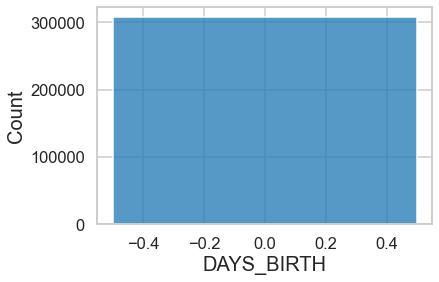

In [106]:
#plotting histogram to check the values in column DAYS_BIRTH
sns.histplot(df.DAYS_BIRTH);


Next step is to convert continous variable columns in datsets with bins for better analysis for columns 'AMT_INCOME_TOTAL'

In [42]:
#Binning is performed by creating ranges and slots for ranges at bins of 25000 each
labels = ['0-20000','20000-40000','40000-60000','60000-80000','80000-100000','100000-120000','120000-140000','140000-160000',
          '160000-180000','180000-200000','200000-220000','220000-240000','240000-260000','260000-280000','280000-300000','300000 and above']
bins = [0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,220000,240000,260000,280000,300000,500000]

df['RANGE_INCOME'] = pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=labels)

In [43]:
#Validating if binning is performed appropriately or not
df.RANGE_INCOME.value_counts()

120000-140000       47038
100000-120000       39639
80000-100000        36335
140000-160000       32752
160000-180000       32457
220000-240000       22652
300000 and above    20037
200000-220000       19667
60000-80000         18811
260000-280000       11950
40000-60000          7589
240000-260000        6890
280000-300000        4017
180000-200000        4012
20000-40000           963
0-20000                 0
Name: RANGE_INCOME, dtype: int64

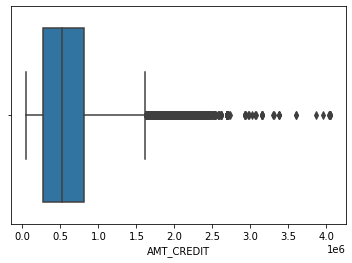

In [44]:
sns.boxplot(df.AMT_CREDIT);

In [45]:
#Binning is performed by creating ranges and slots and converting a continous variable into categorical variable
labels = ['Very low','Low','Medium','High','Very High']
bins = [0,100000,200000,300000,400000,500000]

df['RANGE_AMT_CREDIT'] = pd.cut(df['AMT_CREDIT'],bins,labels=labels)

In [46]:
df.RANGE_AMT_CREDIT.value_counts()

Medium       54813
Very High    32038
Low          30140
High         26338
Very low      6004
Name: RANGE_AMT_CREDIT, dtype: int64

In [47]:
#Validating values for target field
df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [48]:
#Segragating the datasets into separate datasets by splitting based on target values 
# 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
# 0 - - all other cases
df_target_0 = df.loc[df["TARGET"]==0]
df_target_1 = df.loc[df["TARGET"]==1]



Imbalance Ratio: It designates the classification problem wherein observations per class/category is not equally distributed and is skewed towards one of the class variables. 
Calculating the imbalance ratio for target variable 

In [49]:
#From Value count analysis, we know that value 0 is in majority and 1 is in minority
Imbalance_ratio = round(len(df_target_0)/len(df_target_1),2)
Imbalance_ratio 

11.39

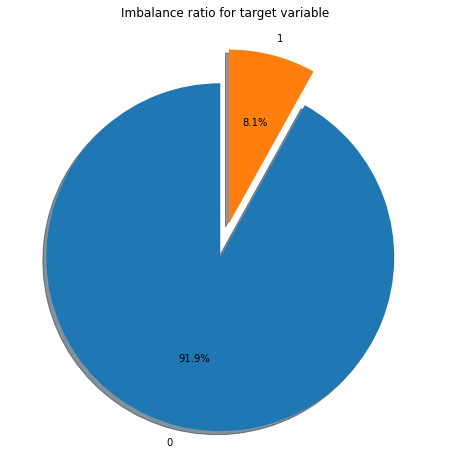

In [50]:
#Plotting imbalance ratio
explode = (0.1,0.1)
fig, axes = plt.subplots(1, 1, figsize = (8, 8))
labels = ['0','1']
axes.title.set_text('Imbalance ratio for target variable')
axes.pie(df["TARGET"].value_counts(), labels = labels , explode = explode, autopct='%1.1f%%', shadow=True, startangle = 90)
plt.show()

# Univariate Analysis on target variable

###### Analysis of Contract type w.r.t. Target Variable across both data sets

In [51]:
# Plotting COntract type w.r.t both datasets for Target variable
explode = (0.1, 0)
colors = ['#008fd5', '#fc4f30']
data0 = df_target_0["NAME_CONTRACT_TYPE"].value_counts()

data1 = df_target_1["NAME_CONTRACT_TYPE"].value_counts()

labels = ['Cash loans','Revolving loans']

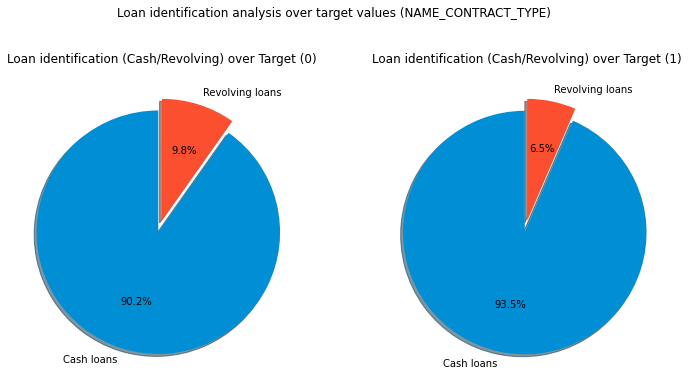

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 12))

ax1.title.set_text('Loan identification (Cash/Revolving) over Target (0)')
ax1.pie(data0, labels = labels ,colors = colors, explode = explode, autopct='%1.1f%%', shadow=True, startangle = 90)

ax2.title.set_text('Loan identification (Cash/Revolving) over Target (1)')
ax2.pie(data1, labels = labels, colors = colors, explode = explode, autopct='%1.1f%%', shadow=True, startangle = 90)
fig.suptitle('Loan identification analysis over target values (NAME_CONTRACT_TYPE)', y=0.75)

plt.show()

Analysis inference points for Univariate analysis over NAME_CONTRACT_TYPE:
-  Clients with payment difficulties tend to slightly prefer Cash loans over revolving loans
-  Overall, Cash loans are preffered by both group of clients heavily and is the preffered loan type

_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________

##### Analysis of Gender w.r.t. Target Variable across both data sets

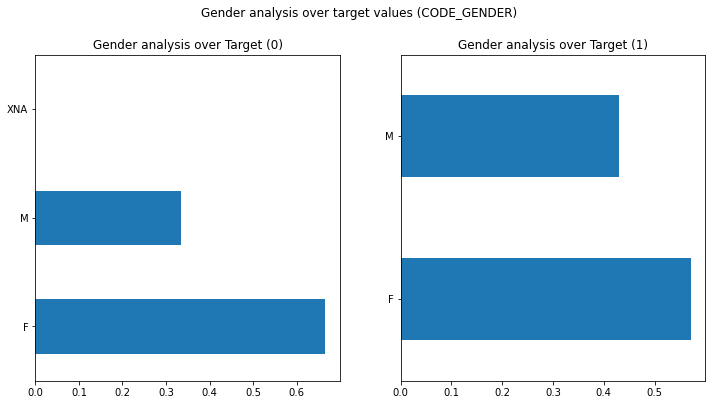

In [53]:
# Plotting COntract type w.r.t both datasets for Target variable
#fig, axes = plt.subplots(2, 1, figsize = (10, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

fig.suptitle('Gender analysis over target values (CODE_GENDER)', y=0.99)
ax1.title.set_text('Gender analysis over Target (0)')
df_target_0.CODE_GENDER.value_counts(normalize = True).plot.barh(ax=ax1)


ax2.title.set_text('Gender analysis over Target (1)')
df_target_1.CODE_GENDER.value_counts(normalize = True).plot.barh(ax=ax2)

plt.show()

Analysis inference points for Univariate analysis over Gender (CODE_GENDER):
-  Ratio of female customers over male customers heavily skew in favor of better payment of loans as males has  relatively higher percentage of defaulters than females 


_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________

###### Analysis of Assets w.r.t. Target Variable across both data sets
* FLAG_OWN_CAR: Flag if the client owns a car
* FLAG_OWN_REALTY: Flag if client owns a house or flat
* FLAG_ASSETS: Boolean if client owns both car and house/flat


In [54]:
# Plotting FLAG_OWN_CAR w.r.t both datasets for Target variable
explode = (0.1, 0)
colors = ['#DFFF00', '#40E0D0']
car0 = df_target_0["FLAG_OWN_CAR"].value_counts()
car1 = df_target_1["FLAG_OWN_CAR"].value_counts()
house0 = df_target_0["FLAG_OWN_REALTY"].value_counts()
house1 = df_target_1["FLAG_OWN_REALTY"].value_counts()
assets0 = df_target_0["FLAG_ASSETS"].value_counts()
assets1 = df_target_1["FLAG_ASSETS"].value_counts()

labels = ['Y','N']

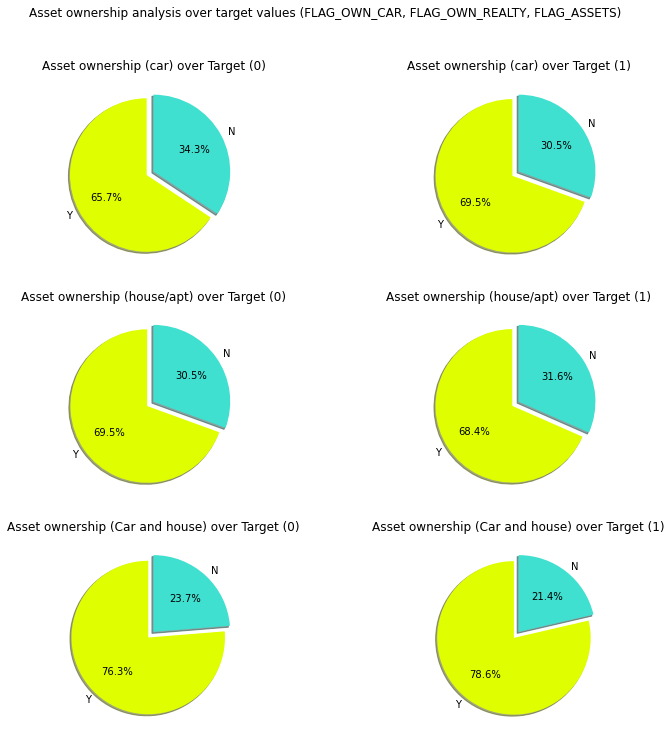

In [55]:
# Plotting COntract type w.r.t both datasets for Target variable
fig, axes = plt.subplots(3, 2, figsize = (12, 12))

fig.suptitle('Asset ownership analysis over target values (FLAG_OWN_CAR, FLAG_OWN_REALTY, FLAG_ASSETS)', y=0.96)

axes[0][0].title.set_text('Asset ownership (car) over Target (0)')
axes[0][0].pie(car0,colors = colors, labels = labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle = 90)

axes[0][1].title.set_text('Asset ownership (car) over Target (1)')
axes[0][1].pie(car1,colors = colors, labels = labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle = 90)

axes[1][0].title.set_text('Asset ownership (house/apt) over Target (0)')
axes[1][0].pie(house0,colors = colors, labels = labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle = 90)

axes[1][1].title.set_text('Asset ownership (house/apt) over Target (1)')
axes[1][1].pie(house1,colors = colors, labels = labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle = 90)


axes[2][0].title.set_text('Asset ownership (Car and house) over Target (0)')
axes[2][0].pie(assets0,colors = colors, labels = labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle = 90)

axes[2][1].title.set_text('Asset ownership (Car and house) over Target (1)')
axes[2][1].pie(assets1,colors = colors, labels = labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle = 90)

plt.show()

Analysis inference points for Univariate analysis over Assets ownership :
-  Data metric is very close in each variable across car ownership, house ownership and ownership of both
-  Data is slightly skewed towards following inference that 
        clients who own car are less likely to repay loans
        clients who own house are more likely to repay loan
        clients who own both house and car are less likely to repay loans
However, since the data metric is too close and very slightly skewed, we cannot confirm these inferences and we will not uses this metric for any conclusion 

###### Analysis of Income type w.r.t. Target Variable across both data sets

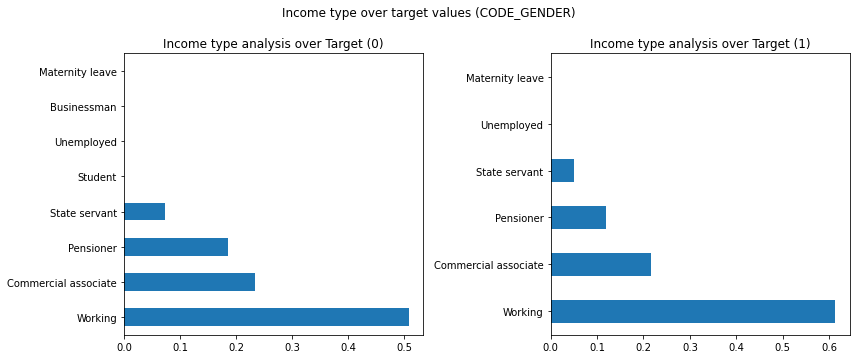

In [56]:
# Plotting Income type w.r.t both datasets for Target variable

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

fig.suptitle('Income type over target values (CODE_GENDER)', y=0.99)
ax1.title.set_text('Income type analysis over Target (0)')
df_target_0.NAME_INCOME_TYPE.value_counts(normalize = True).plot.barh(ax=ax1)


ax2.title.set_text('Income type analysis over Target (1)')
df_target_1.NAME_INCOME_TYPE.value_counts(normalize = True).plot.barh(ax=ax2)
fig.tight_layout()
plt.show()

Analysis inference points for Univariate analysis overIncome Type :
-  Pensioners are more likely to pay the loans


###### Analysis of Education type w.r.t. Target Variable across both data sets

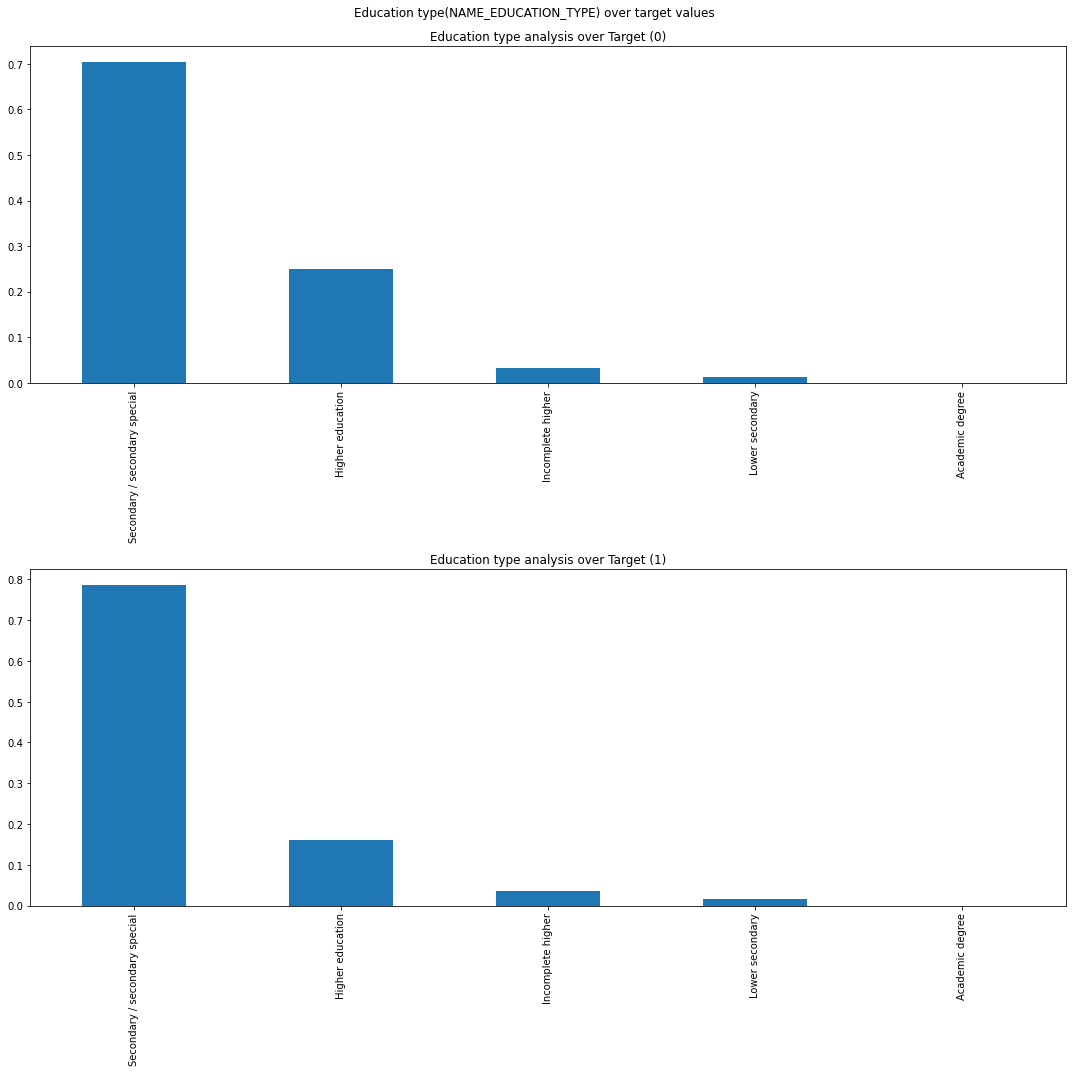

In [57]:
# Plotting Education type w.r.t both datasets for Target variable

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (15, 15))

fig.suptitle('Education type(NAME_EDUCATION_TYPE) over target values ', y=0.99)
ax1.title.set_text('Education type analysis over Target (0)')
df_target_0.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.bar(ax=ax1)
ax2.title.set_text('Education type analysis over Target (1)')
df_target_1.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.bar(ax=ax2)
fig.tight_layout()
plt.show()

 ##### Analysis inference for univariate analysis over education typee
 - Clients with Secondary education are more likely to apply for loans
 - Clients with secondary education are more likely to default loans
 - Clients with higher education are more likely to repay loans 

###### Analysis of Family status w.r.t. Target Variable across both data sets

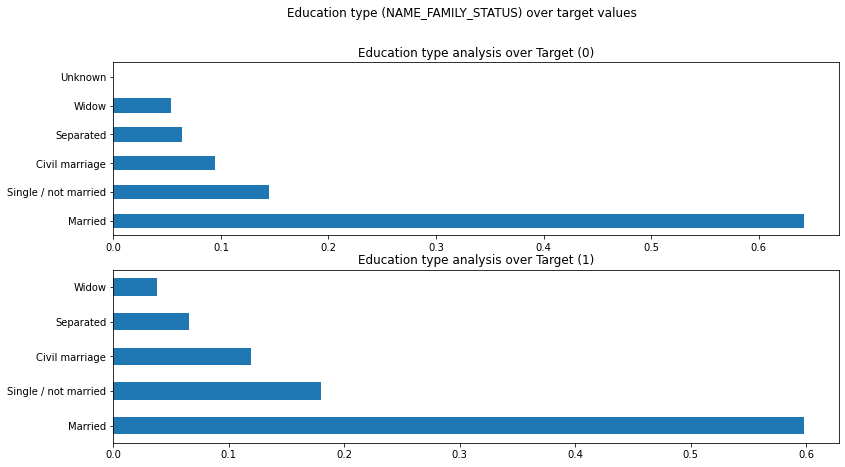

In [58]:
# Plotting Income type w.r.t both datasets for Target variable

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (13, 7))

fig.suptitle('Education type (NAME_FAMILY_STATUS) over target values ', y=0.99)
ax1.title.set_text('Education type analysis over Target (0)')
df_target_0.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.barh(ax=ax1)


ax2.title.set_text('Education type analysis over Target (1)')
df_target_1.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.barh(ax=ax2)

plt.show()

 ##### Analysis inference for univariate analysis over family status
 - Married clients are most likely to apply for loan 
 - Single clients are most likely to default on loan payments
 - Widow clients are more likely to repay loans 

###### Analysis of age of clients w.r.t. Target Variable across both data sets

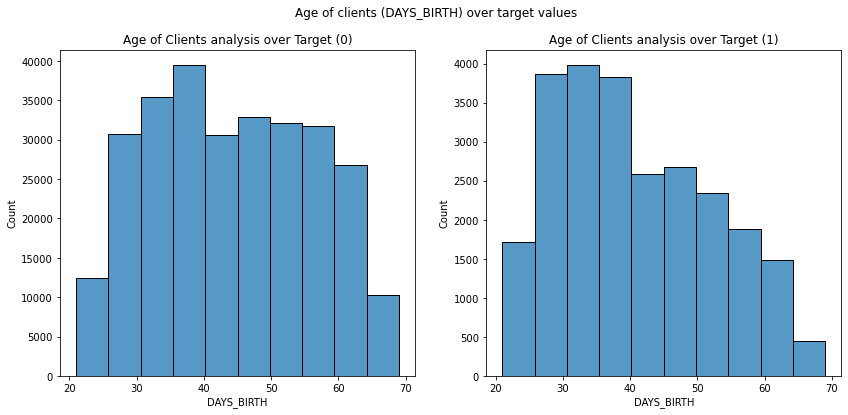

In [59]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14, 6))
fig.suptitle('Age of clients (DAYS_BIRTH) over target values ')

ax1.title.set_text('Age of Clients analysis over Target (0)')
sns.histplot(data= df_target_0, x="DAYS_BIRTH", bins = 10, ax = ax1)

ax2.title.set_text('Age of Clients analysis over Target (1)')
sns.histplot(data= df_target_1, x="DAYS_BIRTH", bins = 10, ax = ax2)
plt.show()

 ##### Analysis inference for univariate analysis over family status
 - Older clients (greater than 40 yrs of age) are most likely to repay loans
 - younger clients are most likley to default on loan payments


###### Analysis of Occupation w.r.t. Target Variable across both data sets

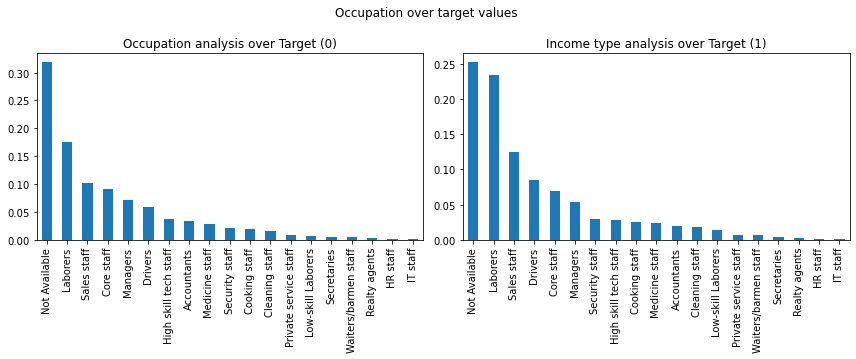

In [60]:
# Plotting Occupation w.r.t both datasets for Target variable

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

fig.suptitle('Occupation over target values ', y=0.99)
ax1.title.set_text('Occupation analysis over Target (0)')
df_target_0.OCCUPATION_TYPE.value_counts(normalize = True).plot.bar(ax=ax1)


ax2.title.set_text('Income type analysis over Target (1)')
df_target_1.OCCUPATION_TYPE.value_counts(normalize = True).plot.bar(ax=ax2)
fig.tight_layout()
plt.show()

 ##### Analysis inference for univariate analysis over occupation type
 - Clients with occupation as laborers are most likely to default on loan payments
 - Sales staff are also most likely to default on payments
 - HR and IT staff are less likely to apply for loan	



###### Analysis of Income w.r.t. Target Variable across both data sets

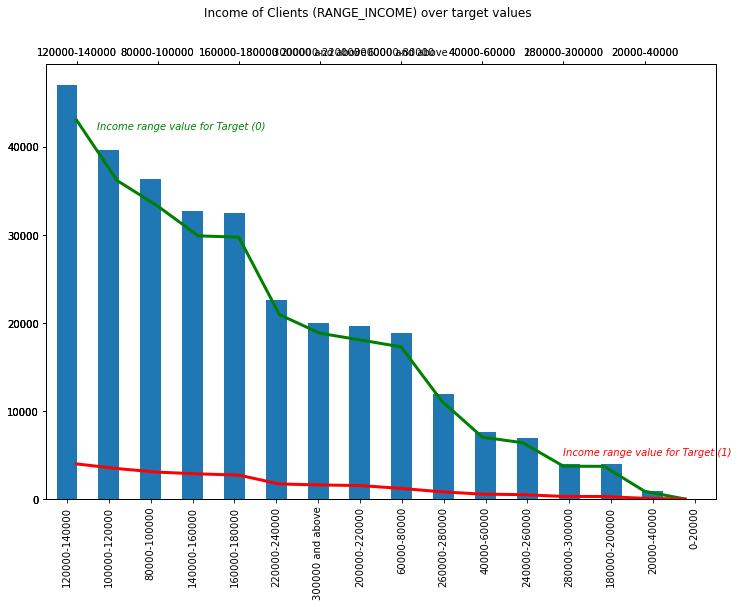

In [61]:
fig, axs = plt.subplots(1,1,figsize = (12, 8))
fig.suptitle('Income of Clients (RANGE_INCOME) over target values ')

#ax1.title.set_text('Income of Clients analysis over Target (0)')
#sns.histplot(data= df_target_0, x="RANGE_INCOME", ax = ax1)
df.RANGE_INCOME.value_counts().plot.bar(ax=axs)
#ax2.title.set_text('Income of Clients analysis over Target (1)')
ax2 = axs.twiny()
df_target_0.RANGE_INCOME.value_counts().plot(kind='line',color='green',linewidth = 3, ax=ax2)
ax2.text(0.5, 42000, 'Income range value for Target (0)', style='oblique', color = 'green', fontweight = 'medium')
ax3 = axs.twiny()
df_target_1.RANGE_INCOME.value_counts().plot(kind='line',color='red', linewidth = 3, ax=ax3)
ax2.text(12, 5000, 'Income range value for Target (1)', style='oblique', color = 'red', fontweight = 'medium')
#df.RANGE_INCOME.value_counts().plot.bar()
plt.show()

 ##### Analysis inference for univariate analysis over income range
- Clients with higher income range brackets greater than 240000 are most likely to repay the loans

- Clients with moderate income range bracket i.e, b/w 80000 to 140000 are more likely to default loans

- Clients with low-income ranges are less likely to apply for loans


#### Bivariate Analysis 

#### Bivariate analysis of Categorical v/s Categorical variables

In [62]:
df_plot = df.groupby(['NAME_EDUCATION_TYPE', 'RANGE_INCOME']).size().reset_index().pivot(columns='NAME_EDUCATION_TYPE', index='RANGE_INCOME', values=0)

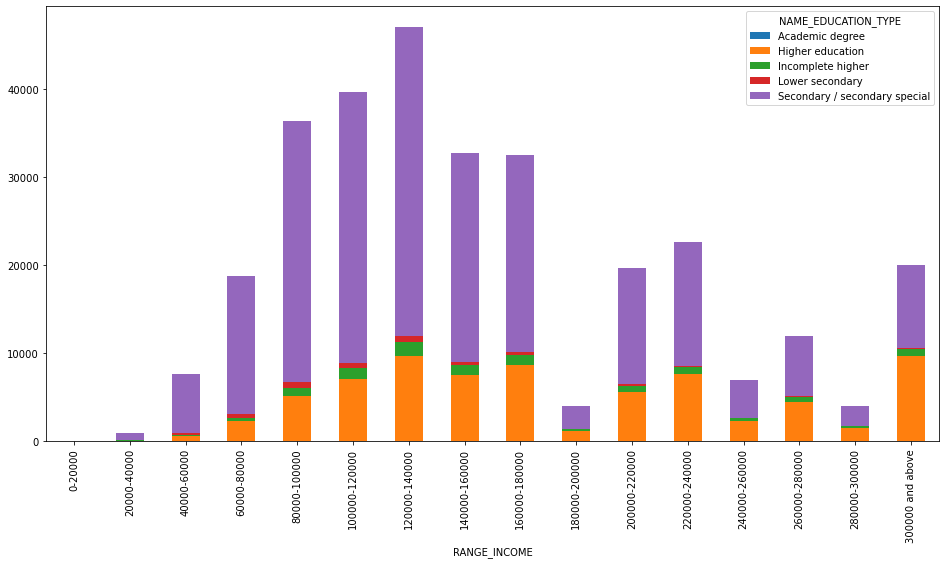

In [63]:
fig, axs = plt.subplots(1,1,figsize = (16, 8))
df_plot.plot(kind='bar', stacked=True,ax=axs)
plt.show()

 ##### Analysis inference for Bivariate analysis of education type w.r.t. income range
 - Clients with low income ranges i.e, less than 80000 have very high percent of clients with secondary level education
 - Clients with mid income range have a balance of education with secondary and higher education
 - Clients with high income range have relatively higher percent of higher education holders


#### Bivariate analysis of numerical  v/s numerical variables
Income vs Credit, Goods price vs Credit 

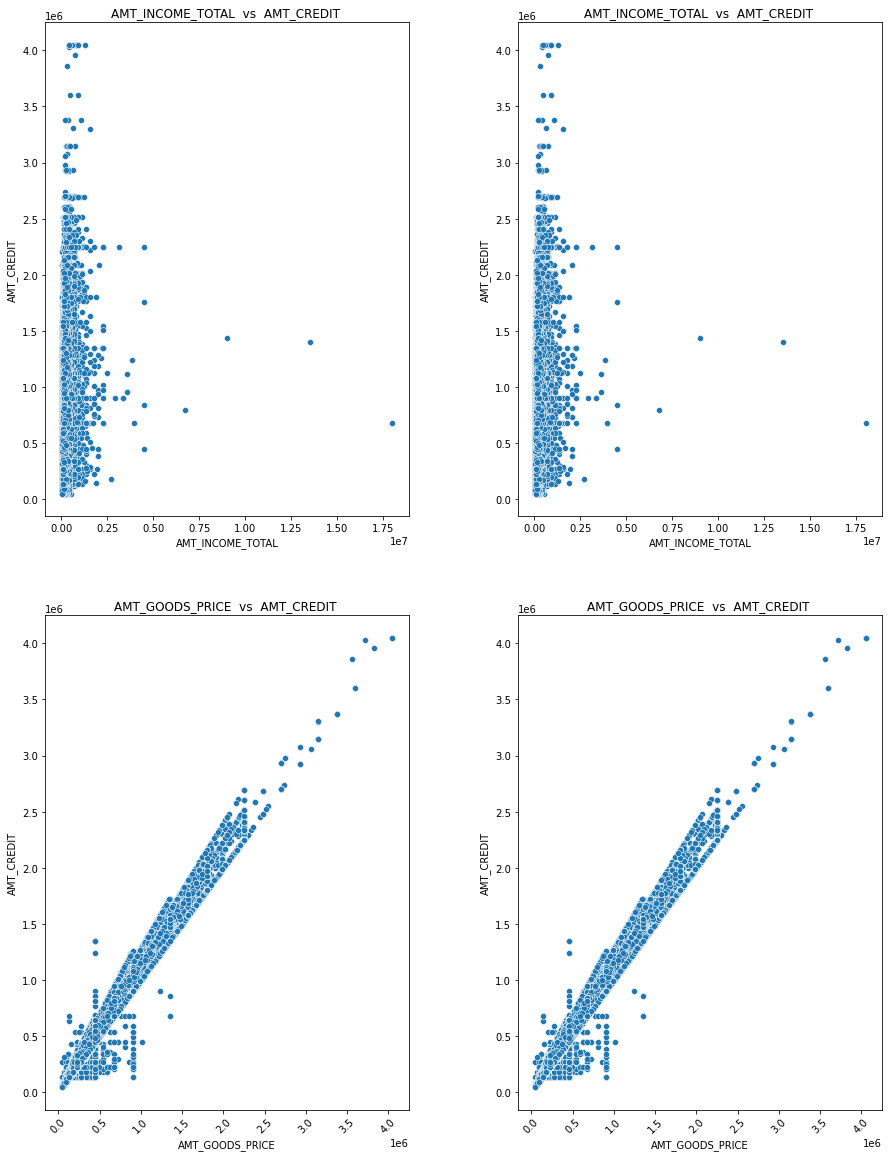

In [64]:
#Scatter plot for numeric columns
plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.scatterplot(df_target_0.AMT_INCOME_TOTAL,df_target_0.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')

plt.subplot(2,2,2)
sns.scatterplot(df_target_0.AMT_INCOME_TOTAL,df_target_0.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')


plt.subplot(2,2,3)
sns.scatterplot(df_target_0.AMT_GOODS_PRICE,df_target_0.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)

plt.subplot(2,2,4)
sns.scatterplot(df_target_0.AMT_GOODS_PRICE,df_target_0.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)
plt.show()

##### Analysis inference for Bivariate analysis of income and credit amount
- Those who have paid the loan amount on/within time are more likely to get higher credits than those who didnt pay/did late payments.

##### Analysis inference for Bivariate analysis of goods price and credit amount
-  People who have higher goods price and have made payments on time have higher credits than those with higher goods price but didnt pay loan.

#### Numerical categorical analysis

Income range- Gender

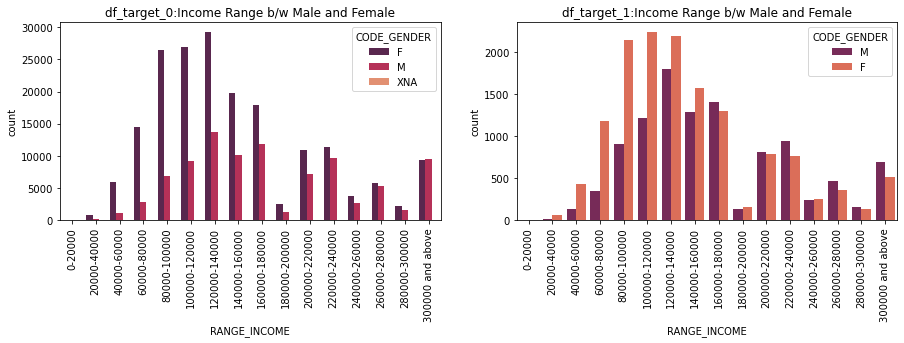

In [65]:
# Numeric variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.title('df_target_0:Income Range b/w Male and Female')
plt.xticks(rotation = 90)

sns.countplot(x='RANGE_INCOME', hue='CODE_GENDER', data=df_target_0, palette='rocket')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('df_target_1:Income Range b/w Male and Female')
plt.xticks(rotation = 90)

sns.countplot(x='RANGE_INCOME', hue='CODE_GENDER', data=df_target_1,palette='rocket')
plt.show()


We can observe that Females with income of upto 200000 don’t have any payment issues

Credit amount vs Education Status

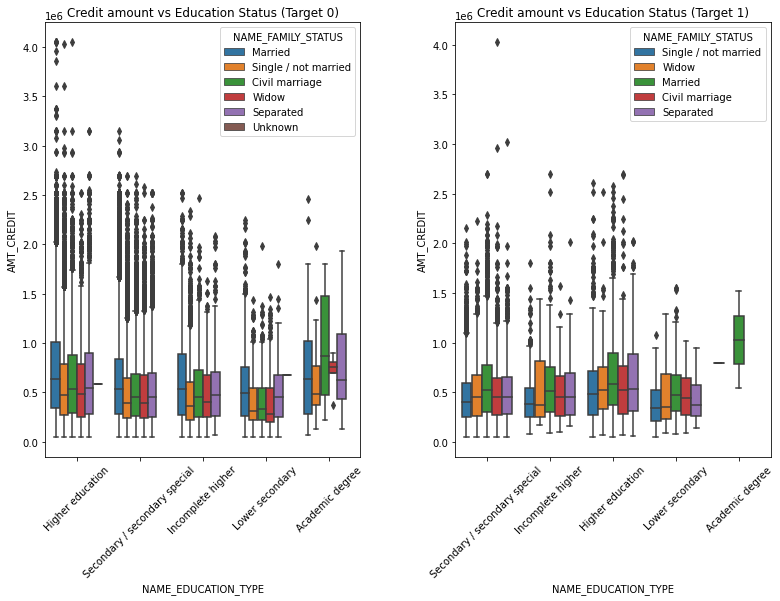

In [66]:
# Box plotting for Credit amount
plt.figure(figsize=(13,8))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
sns.boxplot(data =df_target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status (Target 0)')
plt.xticks(rotation=45)

plt.subplot(122)
sns.boxplot(data =df_target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status (Target 1)')
plt.xticks(rotation=45)
plt.show()

* Civil marriage for Academic degree is having most of the credits in the third quartile.
* Some of the highly educated, married person are having credits higher than those who have done lower secondary eduction. 
* Those with higher eduction have higher credits and are more likely to make payments on time.

Income vs Education Status

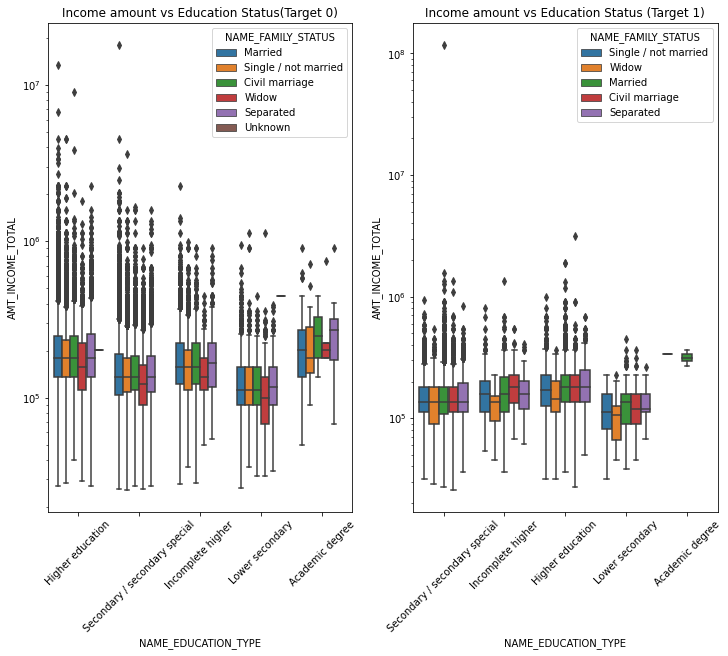

In [67]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(12,9))
plt.subplot(1,2,1)
plt.yscale('log')
sns.boxplot(data =df_target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status(Target 0)')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.yscale('log')
sns.boxplot(data =df_target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status (Target 1)')
plt.xticks(rotation=45)
plt.show()

- We can see that People with higher eductaion have higher income and dont have difficulties in making loan payment. 
- People with higher education who ave lesser income are unable to pay the loan. Hence we can conclude that,people with Higher income are most likely to make payments.

#### Correlation between different variables for both dataframes w.r.t. target variables

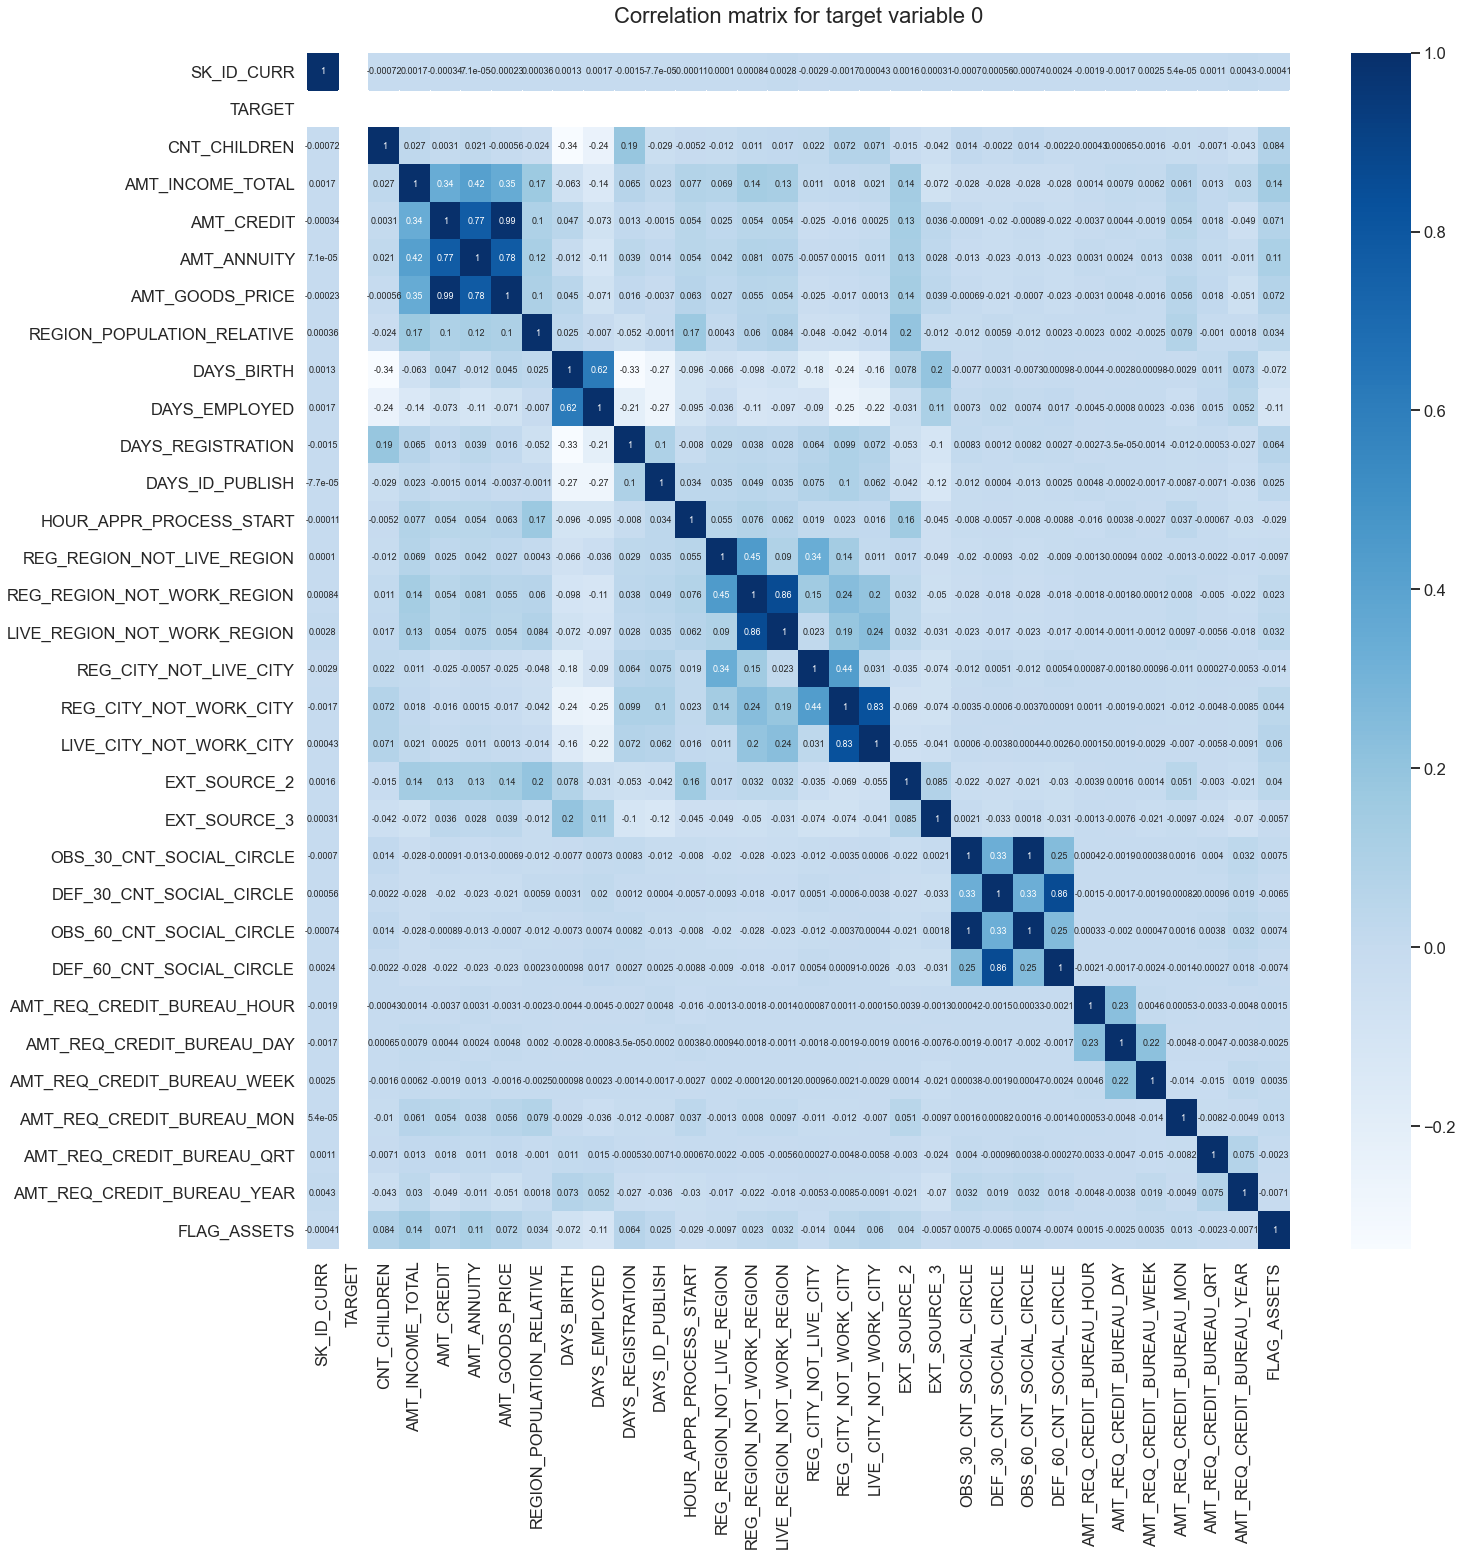

In [99]:
#plotting correlation for few variables w.r.t. target dataset for value 0
plt.figure(figsize=(22,22))
sns.heatmap(df_target_0.corr(), annot = True, annot_kws = {"size":9}, cmap="Blues")
plt.title('Correlation matrix for target variable 0')
plt.show()

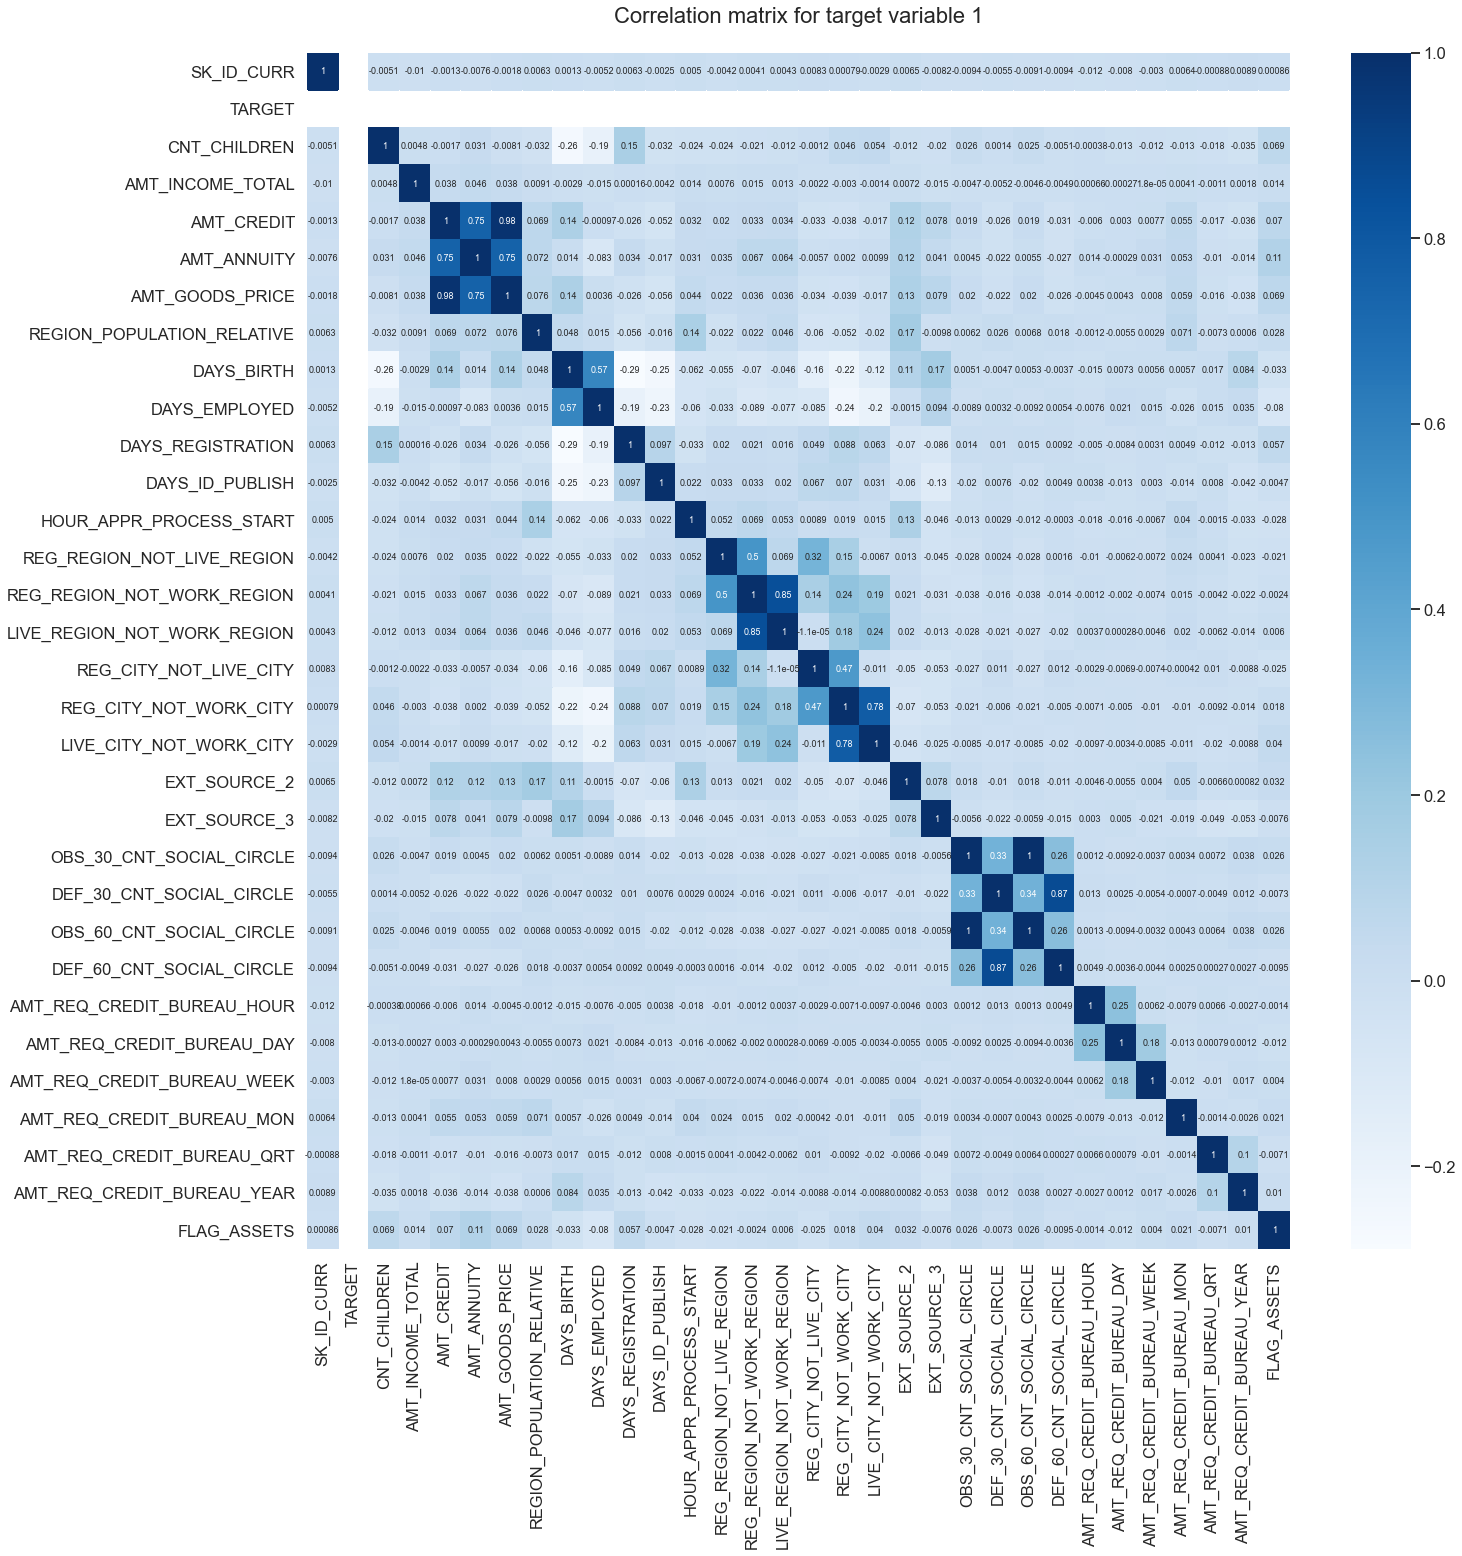

In [100]:
#plotting correlation for few variables w.r.t. target dataset for value 0
plt.figure(figsize=(22,22))
sns.heatmap(df_target_1.corr(), annot = True, annot_kws = {"size":9}, cmap="Blues")
plt.title('Correlation matrix for target variable 1')
plt.show()

In [68]:
# Read data for previous application file
df2 = pd.read_csv('previous_application.csv')
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df2.shape

(1670214, 37)

In [70]:
df2.info(verbose = True, null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [71]:
df2.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [72]:
# columns with high missing percentage i.e >=40%
#Percentage of missing values in all columns 
null_count=round(100*(df2.isnull().sum()/len(df2.index)),2)
null_count

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [73]:
# columns with high missing percentage i.e >=40%
null_count = null_count[null_count>=40.00]
null_count

AMT_DOWN_PAYMENT             53.64
RATE_DOWN_PAYMENT            53.64
RATE_INTEREST_PRIMARY        99.64
RATE_INTEREST_PRIVILEGED     99.64
NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
dtype: float64

In [74]:
# Removing the columns having high percentage of null values
null_cols=([null_count[null_count >=40.00].index])
df2.drop(labels=null_cols[0],axis=1,inplace=True)
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [75]:
df2.shape

(1670214, 26)

In [76]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [77]:
# Percentage of missing values after removing the above columns
round(100*(df2.isnull().sum()/len(df2.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
dtype: float64

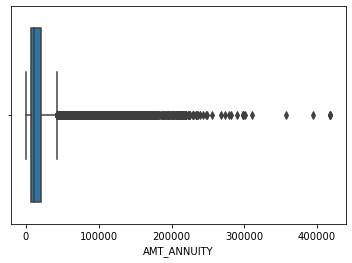

In [78]:
# Let's plot a boxplot to get the outliers

sns.boxplot(df2.AMT_ANNUITY);

AMT_ANNUITY has higher percent of nul values 
We can observe that this column has an outlier which is very large imputing with average would 
not be appropriate in this case hence let's impute  the missing values with median.

In [79]:
median_value = df2['AMT_ANNUITY'].median()

In [80]:
df2.loc[df2['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']= median_value
df2.AMT_ANNUITY.isnull().sum()

0

In [81]:
# Removing the column values of 'XNA' and 'XAP'

df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [82]:
# Merging the previous application datase with the current application dataset
merged_df= pd.merge(df, df2, how='inner', on='SK_ID_CURR',suffixes='_x')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_ASSETS,RANGE_INCOME,RANGE_AMT_CREDIT,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,28.0,-1010,-4799.0,-3015,Laborers,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,80000-100000,Low,1390369,Cash loans,22430.430,94500.0,109971.0,94500.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,42.0,-2668,-5266.0,-3787,Not Available,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0,280000-300000,NaN,1344613,Cash loans,33238.800,1260000.0,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,32.0,-2060,-3557.0,-3557,Drivers,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,0.411849,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,300000 and above,NaN,1077565,Cash loans,52513.515,1350000.0,1487214.0,1350000.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,44.0,-1761,-8236.0,-4292,Managers,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,160000-180000,NaN,1223113,Cash loans,28390.635,337500.0,407911.5,337500.0,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,44.0,-1761,-8236.0,-4292,Managers,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,160000-180000,NaN,1529558,Cash loans,29053.215,450000.0,555723.0,450000.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low


In [83]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   59413 non-null  int64   
 1   TARGET                       59413 non-null  int64   
 2   NAME_CONTRACT_TYPE_          59413 non-null  object  
 3   CODE_GENDER                  59413 non-null  object  
 4   FLAG_OWN_CAR                 59413 non-null  object  
 5   FLAG_OWN_REALTY              59413 non-null  object  
 6   CNT_CHILDREN                 59413 non-null  int64   
 7   AMT_INCOME_TOTAL             59413 non-null  float64 
 8   AMT_CREDIT_                  59413 non-null  float64 
 9   AMT_ANNUITY_                 59413 non-null  float64 
 10  AMT_GOODS_PRICE_             59413 non-null  float64 
 11  NAME_TYPE_SUITE              59413 non-null  object  
 12  NAME_INCOME_TYPE             59413 non-null  object  
 13  N

In [84]:
# Removing unwanted columns
merged_df.drop(['SK_ID_CURR', 'REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_LAST_APPL_PER_CONTRACT',
                'NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

merged_df.head()

,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_ASSETS,RANGE_INCOME,RANGE_AMT_CREDIT,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,28.0,-1010,-4799.0,-3015,Laborers,TUESDAY,16,Business Entity Type 3,0.502779,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,80000-100000,Low,1390369,Cash loans,22430.430,94500.0,109971.0,94500.0,FRIDAY,11,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,42.0,-2668,-5266.0,-3787,Not Available,WEDNESDAY,13,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0,280000-300000,NaN,1344613,Cash loans,33238.800,1260000.0,1260000.0,1260000.0,WEDNESDAY,14,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,32.0,-2060,-3557.0,-3557,Drivers,THURSDAY,10,Self-employed,0.321745,0.411849,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,300000 and above,NaN,1077565,Cash loans,52513.515,1350000.0,1487214.0,1350000.0,MONDAY,14,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,44.0,-1761,-8236.0,-4292,Managers,TUESDAY,8,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,160000-180000,NaN,1223113,Cash loans,28390.635,337500.0,407911.5,337500.0,MONDAY,13,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,44.0,-1761,-8236.0,-4292,Managers,TUESDAY,8,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,160000-180000,NaN,1529558,Cash loans,29053.215,450000.0,555723.0,450000.0,MONDAY,15,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low


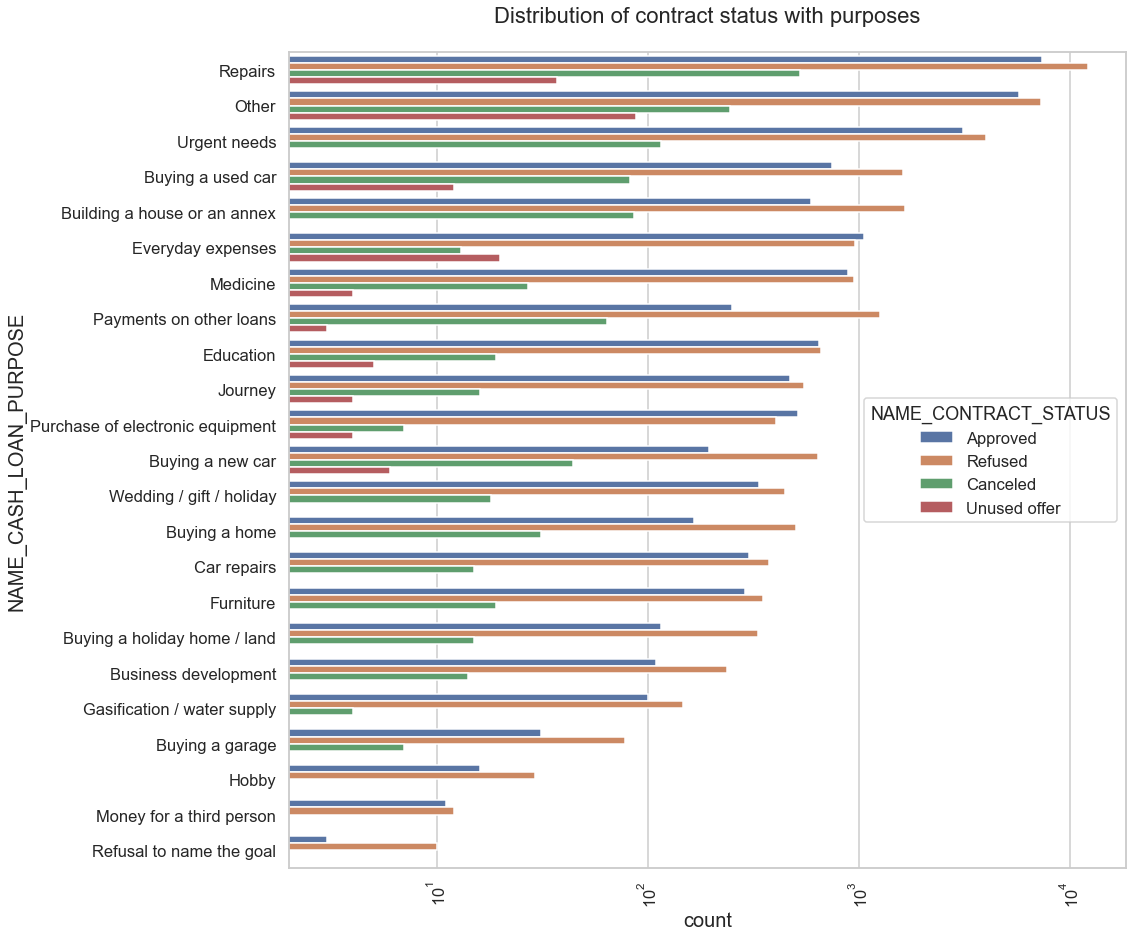

In [85]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,15))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax=sns.countplot(data = merged_df, y='NAME_CASH_LOAN_PURPOSE', order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='deep')

Most rejection of loans came from purpose 'Repairs'. For education purposes we can see equal number of approves and rejection.

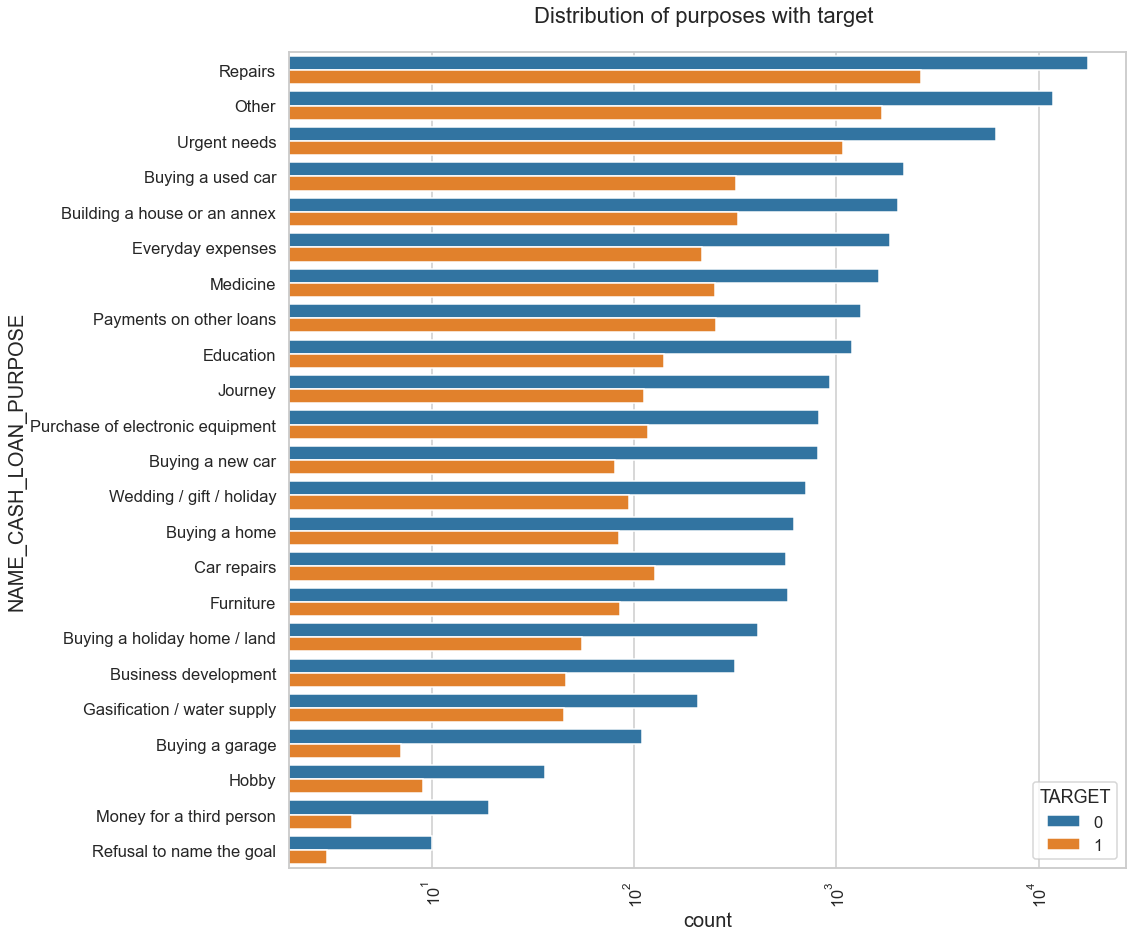

In [86]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,15))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = merged_df, y= 'NAME_CASH_LOAN_PURPOSE', order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')


Loan purposes with 'Repairs' are facing more difficulites in payment on time. loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education.

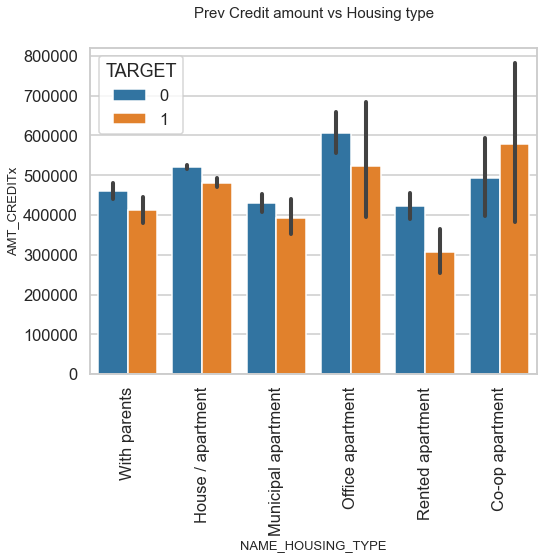

In [87]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.barplot(data =merged_df, y='AMT_CREDITx',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type', fontsize = 15)
plt.xlabel('NAME_HOUSING_TYPE', fontsize = 13)
plt.ylabel('AMT_CREDITx', fontsize = 13);
plt.show()

We can see that office appartment is having higher credit of target 0 and co-op apartment is having 
higher credit of target 1 bank should avoid giving loans to the housing type of co-op apartment.

#### Conclusions

The loan purpose ‘Repair’ is having higher number of unsuccessful payments on time hence bank should
avoid giving loan for this.

Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

Pensioners & people with Higher income are most likely to make payments.